#                                            BANK MARKETING PROJECT 

## 1	Introduction
This is a report of marketing carried out by a bank. The aim is to build a predictive model to predict whether a bank customer will subscribe to a term deposit or not. 
This was carried out to aid the bank in planning.
To be able to do these, firstly, the bank marketing data has been cleaned to correct data structure errors, missing entries, and false or incorrect entries, which is detailed in a section of this report.


In [246]:
#import the necessary libraries
import pandas as pd
import numpy as np

In [247]:
#load the dataset
bank= pd.read_csv('bank_data.csv')

In [248]:
bank #call up the dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### The data contains 41188 observations (row) and 21 variables (columns)

### DATA EXPLORATION

#### This is the first step undertaken when doing any data analysis
#### The raw Bank marketing data contains 21 variables (this includes 7 categorical, 10 numeric, and 4 Boolean variables) 
#### The number of observations (rows) is 41188. 


In [249]:
# #import the library 
# from pandas_profiling import ProfileReport

In [250]:
# !pip install pandas-profiling

In [251]:
# profile=ProfileReport(bank,title="An Overview of Bank Data")

In [252]:
# profile

We had to do use Pandas Profiling to do an exploratory data analysis, to help get early insights and visuals on the data

In [253]:
#import pandas_profiling as pf

In [254]:
#pf.ProfileReport(bank).to_file('Overview of Bank Marketing')

In [255]:
bank.columns #to list all the column names

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

The bank marketing data contains the following columns:

age,job,marital,education,default,housing,loan,contact,month,day_of_week,
duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,
cons.conf.idx,euribor3m,nr.employed,and y
 

In [256]:
bank.shape #to check for the dimensions of the data(number of rows and columns)

(41188, 21)

In [257]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The bank data contains different data types, this includes: 
object or string data types(job,marital,education,default,housing,loan,cotact,month,day_of_week and y),integer data types (age,duration,campaign,pdays,previous) and float data types(emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed).

The bank data has 12718 missing cells, which accounts for 1.5% of the total number of cells (note: total no. of cells = number of columns * number of rows). 

In [258]:
bank.dtypes #to check for the data types

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [259]:
bank.describe() #check the description/statistics of the data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


This was to determine the numerical statistics of the bankmarketing data e.g the mean, the maximum and minimum values and the standard deviation

### DATA CLEANING

In [260]:
bank.isnull().sum() #check for the missing values

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

The Bank marketing data was cleaned by detecting and correcting or removing wrong or inaccurate records from the dataset

There were several columns with missing values, for instance, Job has 40858 entries, meaning 330 entries are missing. The Marital column has 41108 entries, so we are missing 80 entries. The Education column has 39457 entries, missing 1731 entries. The Default column has 32591 entries, missing 8597 entries. Housing and Loan columns have 40198 entries and are each missing 990 entries









From the pandas profile, it shows that the dominant age of the customers is 31-40, with a mean age of 40. The maximum age is 98 and the minimum age is 17

#### CLEANING THE JOB COLUMN

In [261]:
#to explore the job column
job = bank["job"]

In [262]:
job

0          housemaid
1           services
2           services
3             admin.
4           services
            ...     
41183        retired
41184    blue-collar
41185        retired
41186     technician
41187        retired
Name: job, Length: 41188, dtype: object

In [263]:
#check the data type for job
job.apply(type)

0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
41183    <class 'str'>
41184    <class 'str'>
41185    <class 'str'>
41186    <class 'str'>
41187    <class 'str'>
Name: job, Length: 41188, dtype: object

In [264]:
bank['job'].isna().sum() #check for missing rows

330

In [265]:
bank['job'].unique() #to check for the unique rows

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', nan,
       'entrepreneur', 'student'], dtype=object)

In [266]:
bank[pd.isna(bank['job'])]#to locate the row with an empty entry

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,NaN,married,university.degree,NaN,NaN,NaN,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
35,55,NaN,married,basic.4y,NaN,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
73,57,NaN,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
91,57,NaN,married,NaN,NaN,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
144,38,NaN,divorced,high.school,NaN,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40370,59,NaN,married,NaN,no,no,no,cellular,aug,wed,...,1,6,1,success,-1.7,94.027,-38.3,0.900,4991.6,yes
40428,64,NaN,married,NaN,no,yes,no,telephone,aug,fri,...,4,999,0,nonexistent,-1.7,94.027,-38.3,0.905,4991.6,yes
40656,67,NaN,divorced,NaN,NaN,yes,no,cellular,sep,wed,...,2,6,2,success,-1.1,94.199,-37.5,0.880,4963.6,yes
41005,63,NaN,married,professional.course,no,no,no,cellular,oct,thu,...,1,6,1,success,-1.1,94.601,-49.5,1.025,4963.6,no


In [267]:
#to get the mode for the job column
job_mode = bank['job'].mode()

In [268]:
job_mode

0    admin.
dtype: object

In [269]:
replace_jobnan= bank['job'].replace(np.nan,"admin.",inplace=True) #fill the nan values using the mode

In [270]:
# # to replace null values to admin.
# bank['job']= bank['job'].replace (' ','admin.')

In [271]:
bank['job'].isna().sum() #check for missing rows

0

In [272]:
# to replace admin to admin.
bank['job']= bank['job'].replace ('admin','admin.')

In [273]:
bank['job'].unique() #to check for the unique rows

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

The missing values in the Job column were filled by using the imputation technique. The mode was applied, which is the most frequently occurring entry. In this case, the admin was the most frequently occurring entry.







From the pandas profile, a categorical analysis of the job profile of the customers shows that there are more gainfully employed people (admin, blue-collar, and technician) than under-employed and unemployed people. This makes up 65% of the total customers

#### CLEANING THE MARITAL COLUMN

In [274]:
#to explore the marital column
marital = bank["marital"]

In [275]:
marital

0        married
1        married
2        married
3        married
4        married
          ...   
41183    married
41184    married
41185    married
41186    married
41187    married
Name: marital, Length: 41188, dtype: object

In [276]:
bank['marital'].isna().sum() #check for missing rows

80

In [277]:
bank['marital'].unique() #to check for the unique rows

array(['married', 'single', 'divorced', nan], dtype=object)

In [278]:
bank[pd.isna(bank['marital'])] #to locate the row with an empty entry

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
40,58,management,NaN,university.degree,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
390,59,retired,NaN,university.degree,NaN,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
413,57,retired,NaN,basic.4y,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1493,33,services,NaN,high.school,no,yes,yes,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1608,32,admin.,NaN,university.degree,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38550,31,entrepreneur,NaN,university.degree,no,no,no,cellular,oct,thu,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.722,5017.5,yes
38579,31,entrepreneur,NaN,university.degree,no,yes,no,telephone,oct,thu,...,4,999,1,failure,-3.4,92.431,-26.9,0.722,5017.5,no
39322,30,technician,NaN,university.degree,no,no,no,cellular,mar,mon,...,2,11,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes
39323,30,technician,NaN,university.degree,no,no,no,cellular,mar,mon,...,2,6,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes


In [279]:
#to get the mode for the job column
marital_mode = bank['marital'].mode()

In [280]:
marital_mode

0    married
dtype: object

In [281]:
replace_marriednan= bank['marital'].replace(np.nan,"married",inplace=True) #fill the nan values using the mode

In [282]:
bank['marital'].isna().sum() #check for missing rows

0

In [283]:
bank['marital'].unique() #to check for the unique rows

array(['married', 'single', 'divorced'], dtype=object)

Analysing the pandas profile, Married people dominate the population with a percentage of 60.7%.
Single people make up 28.1%, as against divorced with 11.2% of the population


The empty values in the marital column were imputed with ‘married’, which is the most occurring entry in the column

#### CLEANING THE EDUCATION COLUMN

In [284]:
#to explore the education column
education = bank["education"]

In [285]:
education

0                   basic.4y
1                high.school
2                high.school
3                   basic.6y
4                high.school
                ...         
41183    professional.course
41184    professional.course
41185      university.degree
41186    professional.course
41187    professional.course
Name: education, Length: 41188, dtype: object

In [286]:
education.unique() #check for the unique rows

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', nan, 'university.degree', 'illiterate'],
      dtype=object)

In [287]:
bank['education'].isna().sum() #check for missing rows

1731

In [288]:
bank[pd.isna(bank['education'])] #to locate the row with an empty entry

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
26,59,technician,married,NaN,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
30,46,admin.,married,NaN,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
31,59,technician,married,NaN,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34,technician,married,NaN,no,yes,no,cellular,nov,tue,...,2,999,2,failure,-1.1,94.767,-50.8,1.046,4963.6,no
41120,60,admin.,married,NaN,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,no
41122,34,technician,married,NaN,no,no,no,cellular,nov,tue,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes
41135,54,technician,married,NaN,no,yes,no,cellular,nov,thu,...,1,999,1,failure,-1.1,94.767,-50.8,1.041,4963.6,no


In [289]:
#to get the mode for the job column
education_mode = bank['education'].mode()

In [290]:
education_mode

0    university.degree
dtype: object

In [291]:
replace_educationnan= bank['education'].replace(np.nan,"university.degree",inplace=True) #fill the nan values using the mode

In [292]:
bank['marital'].isna().sum() #check for missing rows

0

In [293]:
bank['education'].unique() #to check for the unique rows

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

The missing values in the Education column were filled by using the imputation technique. The mode was applied, which is the most frequently occurring entry. In this case, the ‘university. degree’ was the most frequently occurring entry.

#### CLEANING THE DEFAULT COLUMN

In [294]:
#to explore the default column
default= bank["default"]

In [295]:
default

0         no
1        NaN
2         no
3         no
4         no
        ... 
41183     no
41184     no
41185     no
41186     no
41187     no
Name: default, Length: 41188, dtype: object

In [296]:
default.unique() #check for the unique rows

array(['no', nan, 'yes'], dtype=object)

In [297]:
bank['default'].isna().sum() #check for missing rows

8597

In [298]:
bank[pd.isna(bank['default'])] #to locate the row with an empty entry

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,university.degree,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,university.degree,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
15,54,retired,married,basic.9y,NaN,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40886,70,retired,married,basic.4y,NaN,no,no,cellular,oct,thu,...,1,14,3,failure,-1.1,94.601,-49.5,0.965,4963.6,no
40940,49,admin.,married,high.school,NaN,no,no,cellular,oct,wed,...,1,6,3,success,-1.1,94.601,-49.5,0.985,4963.6,yes
40941,66,retired,married,basic.4y,NaN,NaN,NaN,cellular,oct,wed,...,1,6,3,success,-1.1,94.601,-49.5,0.985,4963.6,yes
40969,84,retired,divorced,basic.4y,NaN,yes,no,cellular,oct,fri,...,4,999,0,nonexistent,-1.1,94.601,-49.5,0.993,4963.6,no


In [299]:
replace_defaultnan = bank['default'].replace(np.nan,"unknown",inplace=True) #replacing the nan values

In [300]:
default.isna().sum()

0

In [301]:
default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

The missing values in the default column were treated as a class label and were replaced with the class name ‘unknown’.

#### CLEANING THE HOUSING COLUMN

In [302]:
#to explore the housing column
housing= bank["housing"]

In [303]:
housing

0         no
1         no
2        yes
3         no
4         no
        ... 
41183    yes
41184     no
41185    yes
41186     no
41187    yes
Name: housing, Length: 41188, dtype: object

In [304]:
housing.unique() #check for the unique rows

array(['no', 'yes', nan], dtype=object)

In [305]:
bank['housing'].isna().sum() #check for missing rows

990

In [306]:
bank[pd.isna(bank['housing'])] #to locate the row with an empty entry

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,admin.,married,university.degree,unknown,NaN,NaN,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
81,51,blue-collar,married,basic.4y,unknown,NaN,NaN,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
261,27,blue-collar,single,basic.6y,no,NaN,NaN,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
385,59,management,married,basic.4y,unknown,NaN,NaN,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
401,48,services,married,high.school,unknown,NaN,NaN,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40990,31,admin.,single,university.degree,no,NaN,NaN,cellular,oct,tue,...,1,3,1,success,-1.1,94.601,-49.5,1.008,4963.6,yes
41014,31,technician,single,professional.course,no,NaN,NaN,cellular,oct,thu,...,2,999,0,nonexistent,-1.1,94.601,-49.5,1.025,4963.6,yes
41015,34,admin.,divorced,university.degree,no,NaN,NaN,cellular,oct,thu,...,2,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,no
41029,46,management,married,university.degree,no,NaN,NaN,cellular,oct,mon,...,2,12,2,failure,-1.1,94.601,-49.5,1.032,4963.6,no


In [307]:
replace_housingnan = bank['housing'].replace(np.nan,"unknown",inplace=True) #replacing the nan values

In [308]:
bank['housing'].isna().sum() #check for missing rows

0

In [309]:
housing.unique() #check for the unique rows

array(['no', 'yes', 'unknown'], dtype=object)

Empty records in the housing column were replaced with unknown. This was the only logical option, as it can’t be imputed with any entry.

#### CLEANING THE LOAN COLUMN

In [310]:
#to explore the loan column
loan= bank["loan"]

In [311]:
loan

0         no
1         no
2         no
3         no
4        yes
        ... 
41183     no
41184     no
41185     no
41186     no
41187     no
Name: loan, Length: 41188, dtype: object

In [312]:
loan.unique() #check for the unique rows

array(['no', 'yes', nan], dtype=object)

In [313]:
bank['loan'].isna().sum() #check for missing rows

990

In [314]:
bank[pd.isna(bank['loan'])] #to locate the row with an empty entry

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,admin.,married,university.degree,unknown,unknown,NaN,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
81,51,blue-collar,married,basic.4y,unknown,unknown,NaN,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
261,27,blue-collar,single,basic.6y,no,unknown,NaN,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
385,59,management,married,basic.4y,unknown,unknown,NaN,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
401,48,services,married,high.school,unknown,unknown,NaN,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40990,31,admin.,single,university.degree,no,unknown,NaN,cellular,oct,tue,...,1,3,1,success,-1.1,94.601,-49.5,1.008,4963.6,yes
41014,31,technician,single,professional.course,no,unknown,NaN,cellular,oct,thu,...,2,999,0,nonexistent,-1.1,94.601,-49.5,1.025,4963.6,yes
41015,34,admin.,divorced,university.degree,no,unknown,NaN,cellular,oct,thu,...,2,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,no
41029,46,management,married,university.degree,no,unknown,NaN,cellular,oct,mon,...,2,12,2,failure,-1.1,94.601,-49.5,1.032,4963.6,no


In [315]:
replace_loannan = bank['loan'].replace(np.nan,"unknown",inplace=True) #replacing the nan values

In [316]:
# to replace admin to admin.
bank['loan']= bank['loan'].replace ('','unknown')

In [317]:
bank['loan'].isna().sum() #check for missing rows

0

In [318]:
loan.unique() #check for the unique rows

array(['no', 'yes', 'unknown'], dtype=object)

The empty records in the loan column were also replaced with the class label ‘unknown’.

In [319]:
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [320]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

After completely cleaning the bank marketing data, the finalized information or features would look like the above, with no missing values

In [321]:
#drop the duration column
drop_data = bank.drop('duration', axis=1,inplace=True)

The duration coulmn was dropped or deleted because it would affectthe performance of the model

In [322]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [323]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

The bank data contains object data types for categorical variables This would be changed to categrical data types below

### CHANGING OBJECT DATA TYPES TO CATEGORICAL DATA TYPES

In [324]:
bank['job'] = bank['job'].astype('category')
bank['marital'] = bank['marital'].astype('category')
bank['education'] = bank['education'].astype('category')
bank['default'] = bank['default'].astype('category')
bank['housing'] = bank['housing'].astype('category')
bank['loan'] = bank['contact'].astype('category')
bank['contact'] = bank['contact'].astype('category')
bank['month'] = bank['month'].astype('category')
bank['day_of_week'] = bank['day_of_week'].astype('category')
bank['poutcome'] = bank['poutcome'].astype('category')
bank['y'] = bank['y'].astype('category')

In [325]:
bank.dtypes #to check for the data types after changing to categorical data types

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
dtype: object

In [326]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,telephone,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,telephone,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,telephone,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [327]:
#pf.ProfileReport(bank).to_file('Overview of Bank Marketing2')

### DATA VISUALISATION

In [328]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

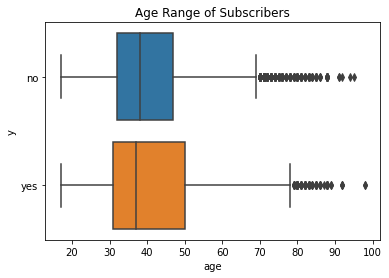

In [329]:
age_range=sns.boxplot(data=bank,x='age',y='y')
plt.title('Age Range of Subscribers')
plt.show()

This shows that there are more term deposit subscribers in the upper quartile (75% percentile) of the age range, but more non-subscribers in the median age group (30-50years)

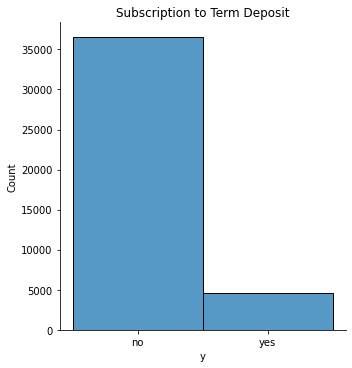

In [330]:
sns.displot(x='y', data=bank)
plt.title('Subscription to Term Deposit')
plt.show()

From the above, it shows that there are fewer customers that subscribed to term deposits than there are actual subscribers

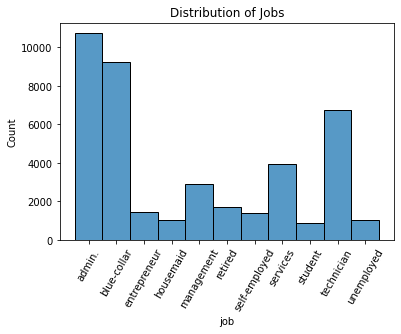

In [331]:
sns.histplot(data=bank,x='job')
plt.title('Distribution of Jobs')
plt.xticks(rotation=60)
plt.show()

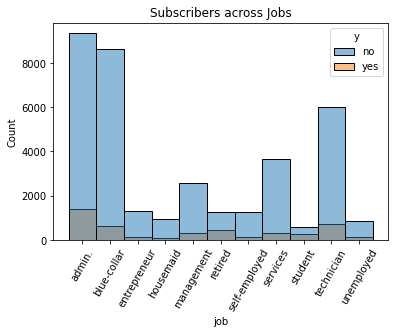

In [332]:
sns.histplot(data=bank,x='job',hue='y')
plt.title('Subscribers across Jobs')
plt.xticks(rotation=60)
plt.show()

From analyzing the "distribution of jobs" and the "subscription to a term deposit", it identifies that the higher number of subscribers to term deposit falls within the customers that are gainfully employed(admin, blue-collar, technician), compared to those that are under-employed or unemployed.

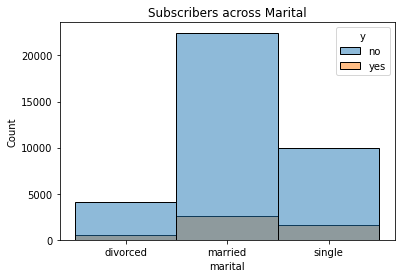

In [333]:
sns.histplot(data=bank,x='marital',hue='y')
plt.title('Subscribers across Marital')

plt.show()

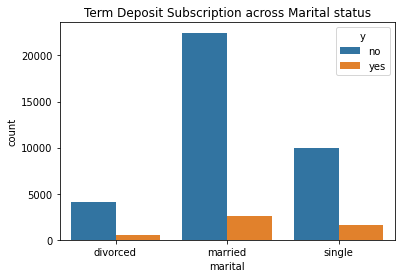

In [334]:
sns.countplot(data=bank,x='marital',hue='y')
plt.title('Term Deposit Subscription across Marital status')
plt.show()

Analysis of the above plots(subscribers across marital status and term deposit subscription across marital status) shows that married customers subscribed the most to a term deposit, followed by single customers, with divorced customers having the least amount of subscribers

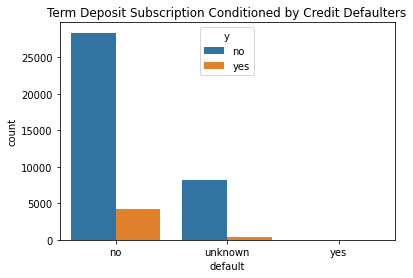

In [335]:
sns.countplot(data=bank,x='default',hue='y')
plt.title('Term Deposit Subscription Conditioned by Credit Defaulters')
plt.show()

Early analysis shows that there is a correlation between those that have taken credit and subscription to a term deposit. Majority of the customers that did not default in credit successfully subscribed to a term deposit, compared to the credit defaulters

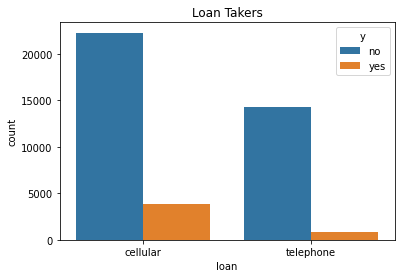

In [336]:
sns.countplot(data=bank,x='loan',hue='y')
plt.title('Loan Takers')
plt.show()

Analysing the Loan Takers shows that there is a correlation between those that have taken Loans and subscription to a term deposit. Majority of the customers that did not take loans also did not subscribe to a term deposit

### DATA MANIPULATION

#### CONVERT CATEGORICAL VARIABLES TO NUMERICAL VARIABLES

In [337]:
#import the libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [339]:
#create an instance
label_encoder = LabelEncoder()

In [340]:
bank['job'] = label_encoder.fit_transform(bank['job'])
bank['marital'] = label_encoder.fit_transform(bank['marital'])
bank['education'] = label_encoder.fit_transform(bank['education'])
bank['default'] = label_encoder.fit_transform(bank['default'])
bank['housing'] = label_encoder.fit_transform(bank['housing'])
bank['loan'] = label_encoder.fit_transform(bank['loan'])
bank['contact'] = label_encoder.fit_transform(bank['contact'])
bank['month'] = label_encoder.fit_transform(bank['month'])
bank['day_of_week'] = label_encoder.fit_transform(bank['day_of_week'])
bank['poutcome'] = label_encoder.fit_transform(bank['poutcome'])
bank['y'] = label_encoder.fit_transform(bank['y'])

We had to use Label encoder to transform non-numerical labels to numerical labels

In [353]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  int32  
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

The bank data contains integer and float data types. We have to convert all the float data types to Integer data types

#### CONVERT FLOAT TO INTEGER DATA TYPES

In [354]:
#to change the emp.var.rate data type to integer
bank['emp.var.rate'] = bank['emp.var.rate'].astype(int)

In [355]:
#to change the cons.price.idx data type to integer
bank['cons.price.idx'] = bank['cons.price.idx'].astype(int)

In [356]:
#to change the cons.conf.idx data type to integer
bank['cons.conf.idx'] = bank['cons.conf.idx'].astype(int)

In [357]:
#to change the euribor3m data type to integer
bank['euribor3m'] = bank['euribor3m'].astype(int)

In [358]:
#to change the nr.employed data type to integer
bank['nr.employed'] = bank['nr.employed'].astype(int)

In [359]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             41188 non-null  int64
 1   job             41188 non-null  int32
 2   marital         41188 non-null  int32
 3   education       41188 non-null  int32
 4   default         41188 non-null  int32
 5   housing         41188 non-null  int32
 6   loan            41188 non-null  int32
 7   contact         41188 non-null  int32
 8   month           41188 non-null  int32
 9   day_of_week     41188 non-null  int32
 10  campaign        41188 non-null  int64
 11  pdays           41188 non-null  int64
 12  previous        41188 non-null  int64
 13  poutcome        41188 non-null  int32
 14  emp.var.rate    41188 non-null  int32
 15  cons.price.idx  41188 non-null  int32
 16  cons.conf.idx   41188 non-null  int32
 17  euribor3m       41188 non-null  int32
 18  nr.employed     41188 non-

All the variables were changed from categorical data types to numerical data types.
Also, variables with float data types were cast into integer data types. This includes emp.var.rate, cons. price.idx, cons.conf.idx, euribor3m, and nr. employed variables. 


In [360]:
bank.dtypes #to check for the data types

age               int64
job               int32
marital           int32
education         int32
default           int32
housing           int32
loan              int32
contact           int32
month             int32
day_of_week       int32
campaign          int64
pdays             int64
previous          int64
poutcome          int32
emp.var.rate      int32
cons.price.idx    int32
cons.conf.idx     int32
euribor3m         int32
nr.employed       int32
y                 int32
dtype: object

In [361]:
#convert all columns of the data frame to integer
bank = bank.apply(pd.to_numeric)

In [362]:
bank.dtypes #to check for the data types

age               int64
job               int32
marital           int32
education         int32
default           int32
housing           int32
loan              int32
contact           int32
month             int32
day_of_week       int32
campaign          int64
pdays             int64
previous          int64
poutcome          int32
emp.var.rate      int32
cons.price.idx    int32
cons.conf.idx     int32
euribor3m         int32
nr.employed       int32
y                 int32
dtype: object

In [363]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,1,1,6,1,1,999,0,1,1,93,-36,4,5191,0
1,57,7,1,3,1,0,1,1,6,1,1,999,0,1,1,93,-36,4,5191,0
2,37,7,1,3,0,2,1,1,6,1,1,999,0,1,1,93,-36,4,5191,0
3,40,0,1,1,0,0,1,1,6,1,1,999,0,1,1,93,-36,4,5191,0
4,56,7,1,3,0,0,1,1,6,1,1,999,0,1,1,93,-36,4,5191,0


In [456]:
#save the data as csv
bank.to_csv('bank.csv',index=False)

The cleaned and manipulated data was saved as a csv file

### MODELLING

In [460]:
#load  the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [461]:
#load the data
url = 'bank.csv'
bank = pd.read_csv(url)

In [367]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,1,1,6,1,1,999,0,1,1,93,-36,4,5191,0
1,57,7,1,3,1,0,1,1,6,1,1,999,0,1,1,93,-36,4,5191,0
2,37,7,1,3,0,2,1,1,6,1,1,999,0,1,1,93,-36,4,5191,0
3,40,0,1,1,0,0,1,1,6,1,1,999,0,1,1,93,-36,4,5191,0
4,56,7,1,3,0,0,1,1,6,1,1,999,0,1,1,93,-36,4,5191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,1,999,0,1,-1,94,-50,1,4963,1
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1,94,-50,1,4963,0
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1,94,-50,1,4963,0
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1,94,-50,1,4963,1


The new data has 41188 rows and 20 features, after dropping the duration column

### LOGISTICS REGRESSION

In [471]:
#create a function that will load the data, splits the data into training and test sets, and normalize the data
def get_data(url,target):
#load the data
    bank = pd.read_csv(url)
#get the features and the target
    features = bank.drop(target,axis=1).values
    label = bank[target].values
#split the data
    x_train,x_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=0)
#normalize the data
    scaler=MinMaxScaler()
    x_train_scaler= scaler.fit_transform(x_train)
    x_test_scaler = scaler.transform(x_test)

    return x_train_scaler,x_test_scaler,y_train,y_test



In [463]:
x_train_scaler.shape,x_test_scaler.shape,y_train.shape

((32950, 19), (8238, 19), (32950,))

In [472]:
#calling the function
x_train_scaler,x_test_scaler,y_train,y_test = get_data(url,'y')

In [473]:
y=bank['y']

#### Model the Data

In [466]:
#function to model the data
def modelling(model_name):
#create an instance of the model    
    model = model_name
#train the model
    model.fit(x_train_scaler,y_train)
#get the training and testing accuracy 
    train_acc = model.score(x_train_scaler,y_train)
    test_acc = model.score(x_test_scaler,y_test)
#return the training and testing accuracy    
    return train_acc,test_acc

In [467]:
#calling the function
train_acc,test_acc = modelling(LogisticRegression())

In [374]:
train_acc,test_acc

(0.9004248861911988, 0.8999757222626851)

- It generalizes well (doesn't overfit or underfit)

#### Regularization of the model

In [375]:
#regularize the model using different values of c
c_values = [0.1,0.2,0.3,0.5,0.8,1.0]
#function to regularize the model
def log_reg(c_values,penalty="l1",solver="liblinear"):
    train_accuracy,test_accuracy = [],[] #empty list to save the result
    for val in c_values:
        train_logreg,test_logreg = modelling(LogisticRegression(C=val))
        
        train_accuracy.append(train_logreg)
        test_accuracy.append(test_logreg)
#return the training and testing accuracy        
    return train_accuracy,test_accuracy    
        

In [376]:
#calling the function
train_accuracy,test_accuracy = log_reg(c_values,penalty="l1",solver="liblinear")

Further regularization of the model was carried out to help with the performance of the model, by using a hyperparameter tuning c-values. 
The c-values of 0.1, 0.2, 0.3, 0.5, 0.8, and 1.0 were used and the model generalized well in all the c-value
A plot of the c-values against the accuracies shows that the testing accuracy went above the training accuracy in all the c-values. The testing accuracy went highest at a c-value of 0.2. A distance function (l1) was used. Because an l1 penalty was used, liblinear was applied as the solver. If the penalty was l2, lbgs or saga would be applied as the solver. This was used to build the model.

In [377]:
train_accuracy

[0.9001213960546283,
 0.9001820940819424,
 0.9002427921092564,
 0.9004248861911988,
 0.9004855842185129,
 0.9004248861911988]

In [378]:
test_accuracy

[0.899368778829813,
 0.899368778829813,
 0.8994901675163874,
 0.8997329448895363,
 0.8998543335761107,
 0.8999757222626851]

#### PLOTTING

In [379]:
import matplotlib.pyplot as plt
%matplotlib inline

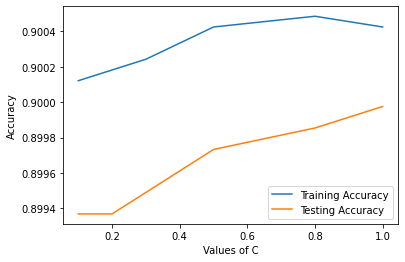

In [380]:
#adding visualisations
plt.plot(c_values,train_accuracy,label="Training Accuracy")
plt.plot(c_values,test_accuracy,label="Testing Accuracy")
plt.legend()
plt.xlabel("Values of C")
plt.ylabel("Accuracy")
plt.show()

From the plot it shows that the training went above the testing in all the c-values. But it was closest at 0.5 and 0.8. let us use the c-values for 0.5 and 0.8 and see which one fits more

In [383]:
train_logreg1,test_logreg1 = modelling(LogisticRegression(C=0.5,penalty="l1",solver="liblinear"))

In [384]:
train_logreg2,test_logreg2 = modelling(LogisticRegression(C=0.8,penalty="l1",solver="liblinear"))

In [385]:
train_logreg1,test_logreg1

(0.900546282245827, 0.8999757222626851)

In [386]:
train_logreg2,test_logreg2

(0.900546282245827, 0.8997329448895363)

For further regularization to help with the performance of the model, a distance function (l1) was used. 
Because an l1 penalty was used, liblinear was applied as the solver.
If the penalty was l2, lbgs or saga would be applied as the solver

Approximated values of the training accuracy shows that the model generalises well, in other words it does not overfit or underfit

#### Model Prediction

In [387]:
#create an instance of the model
logreg = LogisticRegression(C=0.2,penalty="l1",solver="liblinear")

#fit the model
logreg.fit(x_train_scaler,y_train)

#make predictions on the test data
prediction = logreg.predict(x_test_scaler)



In [388]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### PERFORMANCE METRICS FOR LOGISTIC REGRESSION

In [389]:
#import the libraries
from sklearn.metrics import recall_score,precision_score,f1_score,confusion_matrix,classification_report

#### Confusion Matrix

In [390]:
#apply the confusion matrix function
conf = confusion_matrix(y_test,prediction)

conf

array([[7232,   87],
       [ 741,  178]], dtype=int64)

True Positive - This implies that 178 customers subscribed to term deposit and the model correctly predicts that the customers subscribed to term deposit

True Negative - 7232 customers did not subscribe to term deposit and the model correctly predicts that the customers did not subscribe to term deposit

False Positive - 87 customers did not subscribe to a term deposit but the model wrongly predicts that the customers subscribed to a term deposit

False Negative - 741 customers subscribed to a term deposit but the model incorrectly predicts that the customer did not subscribe to a term deposit

#### Recall and Precision

In [391]:
#apply the recall and precision functions
recall = recall_score(y_test,prediction)

precision = precision_score(y_test,prediction)

recall,precision

(0.19368879216539717, 0.6716981132075471)

Here, we have a recall of 19% and a precision of 67%

Recall - out of all the customers that subscribed to term deposit, the model predicted 19% as having subscribed to term deposit

Precision - out of all the customers that were predicted as having subscribed to a term deposit,the model correctly predicted 67%

#### F1_Score

In [392]:
#apply the recall and precision functions
f1_score = f1_score(y_test,prediction)

f1_score

0.3006756756756757

We have an F1 score of 30%

In [393]:
#apply the classification report function
class_rep = classification_report(y_test,prediction)

print ("classification report : \n{}".format(class_rep))

classification report : 
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7319
           1       0.67      0.19      0.30       919

    accuracy                           0.90      8238
   macro avg       0.79      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



A summary of the perfomance metrics for this model, which includes the accuracy, precision, recall and f1-score

#### K-NEAREST NEIGHBOR

In [394]:
from sklearn.neighbors import KNeighborsClassifier

In [395]:
#calling the function to model the data
train_acc,test_acc = modelling(KNeighborsClassifier(n_neighbors=1))

In [396]:
#print the accuracies
print("Train Accuracy:{:.3f}".format(train_acc))
print("Test Accuracy:{:.3f}".format(test_acc))

Train Accuracy:0.993
Test Accuracy:0.850


This model overfits, as the training accuracy is higher than the testing accuracy

The hyperparameter that was used here is n-neighbors

In [397]:
#predict the model
#create an instance of the model
KNN = KNeighborsClassifier(n_neighbors=1)

#fit the model
KNN.fit(x_train_scaler,y_train)

#make predictions on the test data
prediction1 = KNN.predict(x_test_scaler)


In [398]:
prediction1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Plotting

The hyperparameter that was used is n-neigbors . We visualise the accuracy for each neighbor

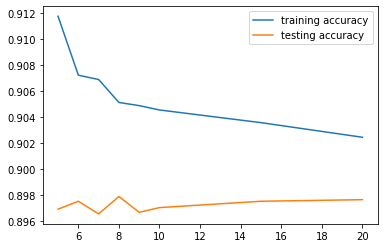

In [399]:
num_neighbors = [5, 6, 7, 8, 9, 10, 15, 20]

training_accuracy = []
testing_accuracy = []

for n_neighbors in num_neighbors:
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn_model = knn.fit(x_train_scaler, y_train)

  # append the training accuracy to the training accuracy list
  training_accuracy.append(knn.score(x_train_scaler, y_train))
  testing_accuracy.append(knn.score(x_test_scaler, y_test))

# visualize the plot
plt.plot(num_neighbors, training_accuracy, label = "training accuracy") 
plt.plot(num_neighbors, testing_accuracy, label = "testing accuracy")
plt.legend(loc = 'best')
plt.show() 

From the plot, it shows that the model overfits in all the n-neighbours considered(in other words the training accuracy is higher than the testing accuracy). 20 n-neighbors gives a better result than the default n-neighbour value of 5

In [400]:
#calling the function to model the data with n-neighbors 20
train_acc,test_acc = modelling(KNeighborsClassifier(n_neighbors=20))

In [401]:
#print the accuracies
print("Train Accuracy:{:.3f}".format(train_acc))
print("Test Accuracy:{:.3f}".format(test_acc))

Train Accuracy:0.902
Test Accuracy:0.898


So, we see the training accuracy reduced from 99.3% to 90.2% while the testing accuracy increased from 85% to 89.8% with 20 neighors. This shows that the KNN model with 20 n-neighbors performs better than the first model in predicting the term deposit subscribers

In [402]:
#predict the model
#create an instance of the model
KNN = KNeighborsClassifier(n_neighbors=20)

#fit the model
KNN.fit(x_train_scaler,y_train)

#make predictions on the test data
prediction1 = KNN.predict(x_test_scaler)

In [403]:
prediction1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### PERFORMANCE METRICS FOR K-NN MODEL

#### Confusion Matrix

In [404]:
#apply the confusion matrix function
conf1 = confusion_matrix(y_test,prediction1)

conf1

array([[7203,  116],
       [ 727,  192]], dtype=int64)

True Positive - This implies that 192 customers subscribed to term deposit and the model correctly predicts that the customers subscribed to term deposit

True Negative - 7203 customers did not subscribe to term deposit and the model correctly predicts that the customers did not subscribe to term deposit

False Positive - 116 customers did not subscribe to a term deposit but the model wrongly predicts that the customers subscribed to a term deposit

False Negative - 727 customers subscribed to a term deposit but the model incorrectly predicts that the customer did not subscribe to a term deposit

#### Recall and Precision

In [405]:
#apply the recall and precision functions
recall1 = recall_score(y_test,prediction1)

precision1 = precision_score(y_test,prediction1)

recall1,precision1

(0.2089227421109902, 0.6233766233766234)

#### Here, we have a recall of 21% and a precision of 62%

Recall - out of all the customers that subscribed to term deposit, the model predicted 21% as having subscribed to term deposit

Precision - out of all the customers that were predicted as having subscribed to a term deposit,the model correctly predicted 62%

In [406]:
from sklearn.metrics import recall_score,precision_score,f1_score,confusion_matrix,classification_report

#### F1_Score

In [407]:
#apply the recall and precision functions
f1_score1 = f1_score(y_test,prediction1)

f1_score1

0.3129584352078239

#### We have an F1 score of 31%

#### Classification Report

In [408]:
#apply the classification report function
class_rep1 = classification_report(y_test,prediction1)

print ("classification report : \n{}".format(class_rep1))

classification report : 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7319
           1       0.62      0.21      0.31       919

    accuracy                           0.90      8238
   macro avg       0.77      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238



A summary of the perfomance metrics for this model, which includes the accuracy, precision, recall and f1-score

### DECISION TREES

In [409]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [410]:
#calling the function to model the data
train_acc,test_acc = modelling(DecisionTreeClassifier())

In [411]:
#print the accuracies
print("Train Accuracy:{:.3f}".format(train_acc))
print("Test Accuracy:{:.3f}".format(test_acc))

Train Accuracy:0.992
Test Accuracy:0.847


This model overfits, this is because the training accuracy is higher than the test accuracy

In [412]:
#predict the model
#create an instance of the model
Dec_Tree = DecisionTreeClassifier()

#fit the model
Dec_Tree.fit(x_train_scaler,y_train)

#make predictions on the test data
prediction2 = Dec_Tree.predict(x_test_scaler)

In [413]:
prediction2

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

#### Plotting

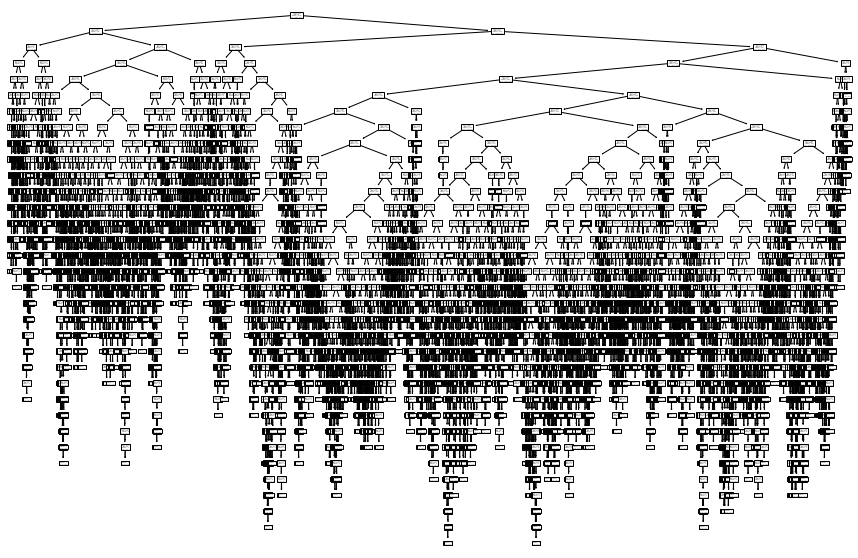

In [414]:
#set the figure size
plt.figure(figsize=(15,10))
#plot the tree using "plot_tree" method
tree.plot_tree(Dec_Tree)
#show the plot
plt.show()

#### Prunning

The hyperparameter that was used for tuning this model is the max_depth

In [415]:
#calling the function to model the data
train_acc,test_acc = modelling(DecisionTreeClassifier(max_depth=4))

In [418]:
#print the accuracies
print("Train Accuracy:{:.3f}".format(train_acc))
print("Test Accuracy:{:.3f}".format(test_acc))

Train Accuracy:0.901
Test Accuracy:0.900


After Prunning, the model generalises well. In other words, the training accuracy is equal to the testing accuracy 

On our Decision tree, we specify a max_depth of 4 , this resulted to a model that generalises very well

#### Model Prediction

In [419]:
#create an instance of the model
Dec_Tree2 = DecisionTreeClassifier(max_depth=4)

#fit the model
Dec_Tree2.fit(x_train_scaler,y_train)

#make predictions on the test data
prediction3 = Dec_Tree2.predict(x_test_scaler)

In [420]:
prediction3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

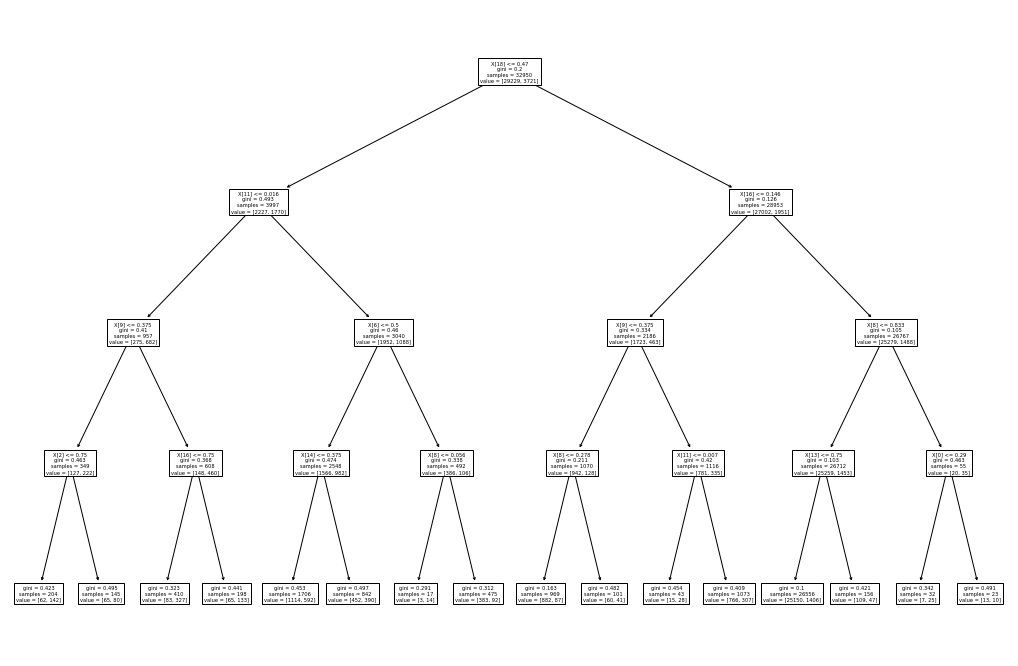

In [421]:
#set the figure size
plt.figure(figsize=(18,12))
#plot the tree using "plot_tree" method
tree.plot_tree(Dec_Tree2)
#show the plot
plt.show()

Visualising the Decision Tree

### PERFORMANCE METRICS FOR DECISION TREE MODEL

#### Confusion Matrix

In [422]:
#apply the confusion matrix function
conf3 = confusion_matrix(y_test,prediction3)

conf3

array([[7234,   85],
       [ 738,  181]], dtype=int64)

True Positive - This implies that 181 customers subscribed to term deposit and the model correctly predicts that the customers subscribed to term deposit

True Negative - 7234 customers did not subscribe to term deposit and the model correctly predicts that the customers did not subscribe to term deposit

False Positive - 85 customers did not subscribe to a term deposit but the model wrongly predicts that the customers subscribed to a term deposit

False Negative - 738 customers subscribed to a term deposit but the model incorrectly predicts that the customer did not subscribe to a term deposit

#### Recall and Precision

In [423]:
#apply the recall and precision functions
recall3 = recall_score(y_test,prediction3)

precision3 = precision_score(y_test,prediction3)

recall3,precision3

(0.1969532100108814, 0.6804511278195489)

#### Here, we have a recall of 20% and a precision of 68%

Recall - out of all the customers that subscribed to term deposit, the model predicted 20% as having subscribed to term deposit

Precision - out of all the customers that were predicted as having subscribed to a term deposit,the model correctly predicted 68%

#### F1_Score

In [424]:
#apply the recall and precision functions
f1_score3 = f1_score(y_test,prediction3)

f1_score3

0.3054852320675106

#### We have an F1 score of 31%

#### Classification Report

In [425]:
#apply the classification report function
class_rep3= classification_report(y_test,prediction3)

print ("classification report : \n{}".format(class_rep3))

classification report : 
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7319
           1       0.68      0.20      0.31       919

    accuracy                           0.90      8238
   macro avg       0.79      0.59      0.63      8238
weighted avg       0.88      0.90      0.87      8238



A summary of the perfomance metrics for this model, which includes the accuracy, precision, recall and f1-score

#### Visualising Feature Importances for Decision Tree

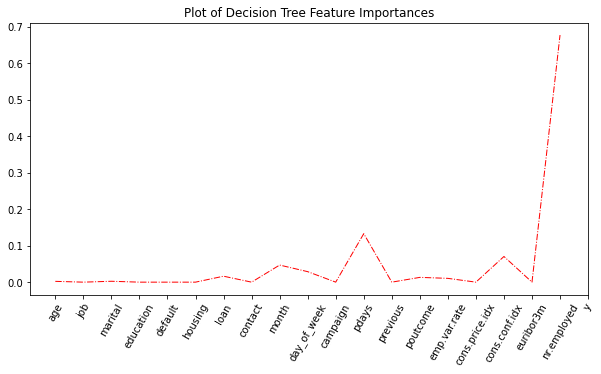

In [426]:
plt.figure(figsize=(10,5))
plt.plot(Dec_Tree2.feature_importances_,linestyle='dashdot', linewidth='1', color='red')
plt.xticks(range(bank.shape[1]),bank,rotation=60)
plt.title("Plot of Decision Tree Feature Importances")
plt.show()

Based on the feature importance plot above, it appears that the most important features considered by the random forest model are number of employees(nr_employed) and number of days that passed by after the client was last contacted from a previous campaign (pdays) , followed closely by consumer confidence index - monthly indicator (cons.conf.idx)

### RANDOM FOREST

In [427]:
from sklearn.ensemble import RandomForestClassifier


In [428]:
#calling the function to model the data
train_acc,test_acc = modelling(RandomForestClassifier())

In [429]:
#print the accuracies
print("Train Accuracy:{:.3f}".format(train_acc))
print("Test Accuracy:{:.3f}".format(test_acc))

Train Accuracy:0.992
Test Accuracy:0.891


#### The random forest model overfits with a training and testing accuracy of 99.2% and 89.1% respectively

##### Model Prediction

In [430]:
#create an instance of the model
rf= RandomForestClassifier()

#fit the model
rf.fit(x_train_scaler,y_train)

#make predictions on the test data
prediction4 = rf.predict(x_test_scaler)

In [431]:
prediction4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Tuning

The hyperparameter that was used is max_depth

In [432]:
#calling the function to model the data
train_acc,test_acc = modelling(RandomForestClassifier(max_depth=4))

In [433]:
#print the accuracies
print("Train Accuracy:{:.3f}".format(train_acc))
print("Test Accuracy:{:.3f}".format(test_acc))

Train Accuracy:0.900
Test Accuracy:0.900


#### After tuning the model with a max-depth set at 4, the model generalises very well with a training and testing accuracy of 90%.

#### Model Prediction

In [434]:
#create an instance of the model
rf= RandomForestClassifier(max_depth=4)

#fit the model
rf.fit(x_train_scaler,y_train)

#make predictions on the test data
prediction5 = rf.predict(x_test_scaler)

In [435]:
prediction5

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### PERFORMANCE METRICS FOR RANDOM FOREST MODEL

#### Confusion Matrix

In [436]:
#apply the confusion matrix function
conf4 = confusion_matrix(y_test,prediction5)

conf4

array([[7239,   80],
       [ 748,  171]], dtype=int64)

True Positive - This implies that 171 customers subscribed to term deposit and the model correctly predicts that the customers subscribed to term deposit

True Negative - 7239 customers did not subscribe to term deposit and the model correctly predicts that the customers did not subscribe to term deposit

False Positive - 80 customers did not subscribe to a term deposit but the model wrongly predicts that the customers subscribed to a term deposit

False Negative - 748 customers subscribed to a term deposit but the model incorrectly predicts that the customer did not subscribe to a term deposit

#### Recall and Precision

In [437]:
#apply the recall and precision functions
recall4 = recall_score(y_test,prediction5)

precision4 = precision_score(y_test,prediction5)

recall4,precision4

(0.18607181719260066, 0.6812749003984063)

#### Here, we have a recall of 19% and a precision of 68%

Recall - out of all the customers that subscribed to term deposit, the model predicted 19% as having subscribed to term deposit

Precision - out of all the customers that were predicted as having subscribed to a term deposit,the model correctly predicted 68%

#### F1_Score

In [438]:
#apply the recall and precision functions
f1_score4 = f1_score(y_test,prediction5)

f1_score4

0.29230769230769227

#### We have an F1 score of 29%

#### Classification Report

In [439]:
#apply the classification report function
class_rep4= classification_report(y_test,prediction5)

print ("classification report : \n{}".format(class_rep4))

classification report : 
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7319
           1       0.68      0.19      0.29       919

    accuracy                           0.90      8238
   macro avg       0.79      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



A summary of the perfomance metrics for this model, which includes the accuracy, precision, recall and f1-score

#### Visualising Feature Importances for Random Forest

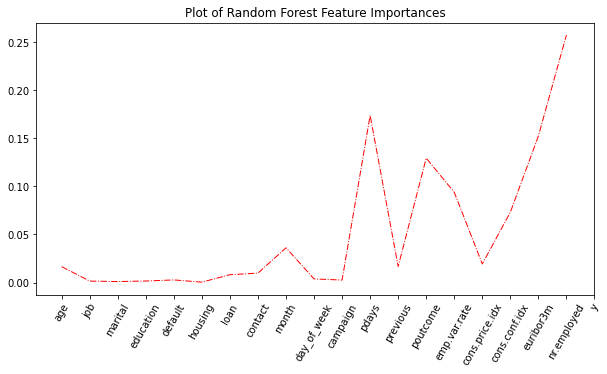

In [440]:
plt.figure(figsize=(10,5))
plt.plot(rf.feature_importances_,linestyle='dashdot', linewidth='1', color='red')
plt.xticks(range(bank.shape[1]),bank,rotation=60)
plt.title("Plot of Random Forest Feature Importances")
plt.show()

Based on the feature importance plot above, it appears that the most important features considered by the random forest model are number of employees(nr_employed) and number of days that passed by after the client was last contacted from a previous campaign (pdays) , followed closely by poutcome 

### DEEP LEARNING

In [441]:
#install the libraries
!pip install tensorflow

In [442]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [443]:
#calling the  get_data function
x_train_scaler,x_test_scaler,y_train,y_test = get_data(url,'y')

In [444]:
x_train_scaler.shape,x_test_scaler.shape,y_train.shape #to get the shape or dimension of the split data

((32950, 19), (8238, 19), (32950,))

#### Model Architecture

In [445]:
model =Sequential()
model.add(Dense(64,input_dim = 19,activation = "relu"))
model.add(Dense(64,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


The architecture of the model had a total of 5,505 parameters 

In [446]:
#compile the model
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

Optimiser that was used is adam. the loss function was binary_crossentropy and the metrics was accuracy 

In [447]:
#train the model
model.fit(x_train_scaler,y_train,epochs = 10,batch_size = 32,validation_split=0.1)

Epoch 1/10
927/927 [==============================] - 6s 4ms/step - loss: 0.2912 - accuracy: 0.8968 - val_loss: 0.2644 - val_accuracy: 0.9093
Epoch 2/10
927/927 [==============================] - 3s 3ms/step - loss: 0.2855 - accuracy: 0.8989 - val_loss: 0.2654 - val_accuracy: 0.9099
Epoch 3/10
927/927 [==============================] - 3s 3ms/step - loss: 0.2846 - accuracy: 0.8987 - val_loss: 0.2617 - val_accuracy: 0.9086
Epoch 4/10
927/927 [==============================] - 3s 3ms/step - loss: 0.2833 - accuracy: 0.8993 - val_loss: 0.2620 - val_accuracy: 0.9090
Epoch 5/10
927/927 [==============================] - 3s 3ms/step - loss: 0.2827 - accuracy: 0.8994 - val_loss: 0.2588 - val_accuracy: 0.9093
Epoch 6/10
927/927 [==============================] - 3s 4ms/step - loss: 0.2818 - accuracy: 0.8995 - val_loss: 0.2642 - val_accuracy: 0.9059
Epoch 7/10
927/927 [==============================] - 3s 3ms/step - loss: 0.2811 - accuracy: 0.8994 - val_loss: 0.2561 - val_accuracy: 0.9086
Epoch 

##### training accuracy : 0.9001
#### validation accuracy : 0.9099


The Deep Learning model generalises well, in other words it neither overfits nor underfits. The training accuracy is equal to the validation accuracy.
Also, notice the consistent decrease in the loss

The architecture of the model I created had a total of 5,505 parameters with three dense layers with 64, 64, and 1 unit respectively, and a sigmoid activation function for the outer layer with epochs set to 10. The batch size was 32. The validation accuracy was 0.9099.

### BALANCING THE DATA

To balance the data, we have to oversample the minority class in the target variable using the smote function

The aim is to balance the data and then re-build those models we have built before, and finally compare the performances of these models

In [474]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [475]:
#import the SMOTE library
from collections import Counter
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [469]:
#create an instance for SMOTE
sm = SMOTE(random_state=42)

In [484]:
# select the features and the target for the model
features = bank.drop('y', axis = 1)
target = bank['y']

In [485]:
#apply SMOTE to the features and target
features_smote, target_smote = sm.fit_resample(features, target)
print("Original target shape: {}".format(Counter(target)))
print("Resampled target shape: {}".format(Counter(target_smote)))

Original target shape: Counter({0: 36548, 1: 4640})
Resampled target shape: Counter({0: 36548, 1: 36548})


In [486]:
len(features_smote),len(target_smote)

(73096, 73096)

The length of data after balancing

#### Data Preparation after balancing the data

In [487]:
#create a function that will load the data, splits the data into training and test sets, and normalize the data
def get_data(url,target):
#load the data
    bank = pd.read_csv(url)

#split the data
    x_train,x_test,y_train,y_test = train_test_split(features_smote,target_smote,test_size=0.2,random_state=0)
#normalize the data
    scaler=MinMaxScaler()
    x_train_scaler= scaler.fit_transform(x_train)
    x_test_scaler = scaler.transform(x_test)

    return x_train_scaler,x_test_scaler,y_train,y_test


In [488]:
#calling the get_data function
x_train_scaler,x_test_scaler,y_train,y_test = get_data(url,'y')

#### Model the Data

In [489]:
#function to model the data
def modelling(model_name):
#create an instance of the model    
    model = model_name
#train the model
    model.fit(x_train_scaler,y_train)
#get the training and testing accuracy 
    train_acc = model.score(x_train_scaler,y_train)
    test_acc = model.score(x_test_scaler,y_test)
#return the training and testing accuracy    
    return train_acc,test_acc

#### Logistic Regression Model

In [490]:
#calling the function
train_acc,test_acc = modelling(LogisticRegression())

In [491]:
train_acc,test_acc

(0.7629967850058144, 0.7581395348837209)

The logistic regression model overfits slightly, with a training and test accuracy of 76.3% and 75.8%. Even though the model is better than before balancing the data, but the training accuracy reduced

#### Model Prediction

In [492]:
#create an instance of the model
logreg = LogisticRegression(C=0.2,penalty="l1",solver="liblinear")

#fit the model
logreg.fit(x_train_scaler,y_train)

#make predictions on the test data
prediction6 = logreg.predict(x_test_scaler)

In [493]:
prediction6

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

#### Regularization of the Model

In [500]:
#regularize the model using different values of c
c_values = [0.1,0.2,0.3,0.5,0.8,1.0]
#function to regularize the model
def log_reg(c_values,penalty="l1",solver="liblinear"):
    train_accuracy,test_accuracy = [],[] #empty list to save the result
    for val in c_values:
        train_logreg2,test_logreg2 = modelling(LogisticRegression(C=val))
        
        train_accuracy.append(train_logreg2)
        test_accuracy.append(test_logreg2)
#return the training and testing accuracy        
    return train_accuracy,test_accuracy 

In [504]:
 #calling the function
train_accuracy,test_accuracy = log_reg(c_values,penalty="l1",solver="liblinear")

For further regularization to help with the performance of the model, a distance function (l1) was used. Because an l1 penalty was used, liblinear was applied as the solver. If the penalty was l2, lbgs or saga would be applied as the solver

In [502]:
train_accuracy

[0.7606710445310897,
 0.7616971065052329,
 0.7620904302619879,
 0.7626376633148643,
 0.7630309870716191,
 0.7629967850058144]

In [503]:
test_accuracy

[0.755608755129959,
 0.7568399452804377,
 0.7575923392612859,
 0.7578659370725034,
 0.7579343365253078,
 0.7581395348837209]

#### Plotting

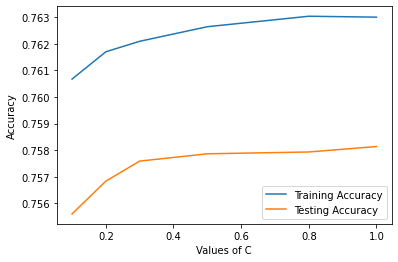

In [505]:
#adding visualisations
plt.plot(c_values,train_accuracy,label="Training Accuracy")
plt.plot(c_values,test_accuracy,label="Testing Accuracy")
plt.legend()
plt.xlabel("Values of C")
plt.ylabel("Accuracy")
plt.show()

A plot of the model shows that the model overfits in all of the c-values, with the best accuracy achieved at a c-value of 0.5

In [506]:
train_logreg3,test_logreg3 = modelling(LogisticRegression(C=0.5,penalty="l1",solver="liblinear"))

In [507]:
train_logreg3,test_logreg3

(0.7627915726109857, 0.7594391244870041)

After using a c-value of 0.5, the model generalises well with approximated values of the training and testing accuracy, which gives 76% accuracy on both 

#### Model Prediction

In [508]:
#create an instance of the model
logreg3 = LogisticRegression(C=0.5,penalty="l1",solver="liblinear")

#fit the model
logreg3.fit(x_train_scaler,y_train)

#make predictions on the test data
prediction7 = logreg3.predict(x_test_scaler)

In [509]:
prediction7

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

### PERFORMANCE METRICS FOR LOGISTIC REGRESSION

#### Confusion Matrix

In [510]:
#apply the confusion matrix function
conf5 = confusion_matrix(y_test,prediction7)

conf5

array([[5835, 1367],
       [2149, 5269]], dtype=int64)

True Positive - This implies that 5269 customers subscribed to term deposit and the model correctly predicts that the customers subscribed to term deposit

True Negative - 5835 customers did not subscribe to term deposit and the model correctly predicts that the customers did not subscribe to term deposit

False Positive - 1367 customers did not subscribe to a term deposit but the model wrongly predicts that the customers subscribed to a term deposit

False Negative - 2149 customers subscribed to a term deposit but the model incorrectly predicts that the customer did not subscribe to a term deposit

#### Recall and Precision

In [511]:
#apply the recall and precision functions
recall5 = recall_score(y_test,prediction7)

precision5 = precision_score(y_test,prediction7)

recall5,precision5

(0.7102992720409814, 0.7940024110910187)

#### Here, we have a recall of 71% and a precision of 79%

Recall - out of all the customers that subscribed to term deposit, the model predicted 71% as having subscribed to term deposit

Precision - out of all the customers that were predicted as having subscribed to a term deposit,the model correctly predicted 79%

#### F1_score

In [512]:
#apply the recall and precision functions
f1_score5 = f1_score(y_test,prediction7)

f1_score5

0.7498221147004411

#### We have an F1 score of 75%

#### Classification Report

In [513]:
#apply the classification report function
class_rep5 = classification_report(y_test,prediction7)

print ("classification report : \n{}".format(class_rep5))

classification report : 
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      7202
           1       0.79      0.71      0.75      7418

    accuracy                           0.76     14620
   macro avg       0.76      0.76      0.76     14620
weighted avg       0.76      0.76      0.76     14620



A summary of the perfomance metrics for this model, which includes the accuracy, precision, recall and f1-score

### K-NEAREST NEIGHBORS(K-NN)

In [514]:
#calling the function to model the balanced data
train_acc,test_acc = modelling(KNeighborsClassifier(n_neighbors=1))

In [515]:
train_acc,test_acc

(0.9870545180928928, 0.8681258549931601)

#### This model overfits, with a training and testing accuracy of 98.7% and 86.8% respectively

In [516]:
#predict the model
#create an instance of the model
KNN = KNeighborsClassifier(n_neighbors=1)

#fit the model
KNN.fit(x_train_scaler,y_train)

#make predictions on the test data
prediction8 = KNN.predict(x_test_scaler)

In [517]:
prediction8

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

#### Plotting

The hyperparameter that was used is n-neighbors

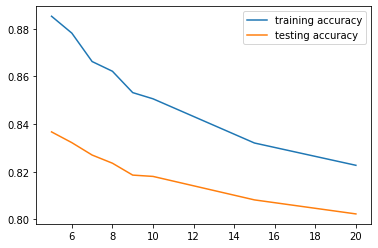

In [518]:
num_neighbors = [5, 6, 7, 8, 9, 10, 15, 20]

training_accuracy = []
testing_accuracy = []

for n_neighbors in num_neighbors:
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn_model = knn.fit(x_train_scaler, y_train)

  # append the training accuracy to the training accuracy list
  training_accuracy.append(knn.score(x_train_scaler, y_train))
  testing_accuracy.append(knn.score(x_test_scaler, y_test))

# visualize the plot
plt.plot(num_neighbors, training_accuracy, label = "training accuracy") 
plt.plot(num_neighbors, testing_accuracy, label = "testing accuracy")
plt.legend(loc = 'best')
plt.show() 

From the plot, it shows that the model overfits in all the n-neighbours considered. 20 n-neighbors gives a better result than the default n-neighbour value of 5

In [519]:
#calling the function to model the data with n-neighbors 20
train_acc,test_acc = modelling(KNeighborsClassifier(n_neighbors=20))

In [520]:
#print the accuracies
print("Train Accuracy:{:.3f}".format(train_acc))
print("Test Accuracy:{:.3f}".format(test_acc))

Train Accuracy:0.823
Test Accuracy:0.802


So, we see the training accuracy reduced from 99.1% to 82.3% while the testing accuracy also reduced from 86.8% to 80.2% with 20 neighors. This shows that the KNN model after balancing the data with 20 n-neighbors performs better than the first model in predicting the term deposit subscribers

In [521]:
#predict the model
#create an instance of the model
KNN = KNeighborsClassifier(n_neighbors=20)

#fit the model
KNN.fit(x_train_scaler,y_train)

#make predictions on the test data
prediction9 = KNN.predict(x_test_scaler)

In [522]:
prediction9

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

### PERFORMANCE METRICS FOR K-NN MODEL

#### Confusion Matrix

In [523]:
#apply the confusion matrix function
conf6 = confusion_matrix(y_test,prediction9)

conf6

array([[5902, 1300],
       [1590, 5828]], dtype=int64)

True Positive - This implies that 5828 customers subscribed to term deposit and the model correctly predicts that the customers subscribed to term deposit

True Negative - 5902 customers did not subscribe to term deposit and the model correctly predicts that the customers did not subscribe to term deposit

False Positive - 1300 customers did not subscribe to a term deposit but the model wrongly predicts that the customers subscribed to a term deposit

False Negative - 1590 customers subscribed to a term deposit but the model incorrectly predicts that the customer did not subscribe to a term deposit

#### Recall and Precision

In [524]:
#apply the recall and precision functions
recall6 = recall_score(y_test,prediction9)

precision6 = precision_score(y_test,prediction9)

recall6,precision6

(0.7856565111889997, 0.8176206509539843)

After balancing the data, the recall and precision increased to 79% and 82%% respectively, which is a better result compared to the unbalanced data

Recall - out of all the customers that subscribed to term deposit, the model predicted 79% as having subscribed to term deposit

Precision - out of all the customers that were predicted as having subscribed to a term deposit,the model correctly predicted 82%

#### F1_Score

In [525]:
#apply the recall and precision functions
f1_score6 = f1_score(y_test,prediction9)

f1_score6

0.8013199505018562

After balancing the data, the F1 score increased to 80%, which is a better score than the unbalanced data

#### Classification Report

In [526]:
#apply the classification report function
class_rep6 = classification_report(y_test,prediction9)

print ("classification report : \n{}".format(class_rep6))

classification report : 
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      7202
           1       0.82      0.79      0.80      7418

    accuracy                           0.80     14620
   macro avg       0.80      0.80      0.80     14620
weighted avg       0.80      0.80      0.80     14620



-A summary of the perfomance metrics for this model, which includes the accuracy, precision, recall and f1-score

### DECISION TREE

In [527]:
#calling the function to model the balanced data
train_acc,test_acc = modelling(DecisionTreeClassifier(max_depth=4))

In [528]:
#print the accuracies
print("Train Accuracy:{:.3f}".format(train_acc))
print("Test Accuracy:{:.3f}".format(test_acc))

Train Accuracy:0.742
Test Accuracy:0.738


For the Decision tree, we specify a tree with a max_depth of 4 , this resulted to a model that generalises very well. Although this resulted in a decrease of the training accuracy

#### Model Prediction

In [529]:
#create an instance of the model
Dec_Tree3 = DecisionTreeClassifier(max_depth=4)

#fit the model
Dec_Tree3.fit(x_train_scaler,y_train)

#make predictions on the test data
prediction10 = Dec_Tree3.predict(x_test_scaler)

In [530]:
prediction10

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

### PERFORMANCE METRICS OF THE DECISION TREE MODEL

#### Confusion Matrix

In [531]:
#apply the confusion matrix function
conf7 = confusion_matrix(y_test,prediction10)

conf7

array([[6385,  817],
       [3020, 4398]], dtype=int64)

True Positive - This implies that 4398 customers subscribed to term deposit and the model correctly predicts that the customers subscribed to term deposit

True Negative - 6385 customers did not subscribe to term deposit and the model correctly predicts that the customers did not subscribe to term deposit

False Positive - 817 customers did not subscribe to a term deposit but the model wrongly predicts that the customers subscribed to a term deposit

False Negative - 3020 customers subscribed to a term deposit but the model incorrectly predicts that the customer did not subscribe to a term deposit

#### Recall and Precision

In [532]:
#apply the recall and precision functions
recall7 = recall_score(y_test,prediction10)

precision7 = precision_score(y_test,prediction10)

recall7,precision7

(0.5928821784847668, 0.8433365292425695)

After balancing the data, the recall and precision increased to 59% and 84%% respectively, which is a better result compared to the unbalanced data

Recall - out of all the customers that subscribed to term deposit, the model predicted 59% as having subscribed to term deposit

Precision - out of all the customers that were predicted as having subscribed to a term deposit,the model correctly predicted 84%

#### F1_Score

In [533]:
#apply the recall and precision functions
f1_score7 = f1_score(y_test,prediction10)

f1_score7

0.6962716694371883

After balancing the data, the F1 score increased to 70%, which is a better score than the unbalanced data

#### Classification Report

In [534]:
#apply the classification report function
class_rep7 = classification_report(y_test,prediction10)

print ("classification report : \n{}".format(class_rep7))

classification report : 
              precision    recall  f1-score   support

           0       0.68      0.89      0.77      7202
           1       0.84      0.59      0.70      7418

    accuracy                           0.74     14620
   macro avg       0.76      0.74      0.73     14620
weighted avg       0.76      0.74      0.73     14620



A summary of the perfomance metrics for this model, which includes the accuracy, precision, recall and f1-score

### RANDOM FOREST

The hyperparameter that was used is max-depth

In [535]:
#calling the function to model the data
train_acc,test_acc = modelling(RandomForestClassifier(max_depth=4))

In [536]:
#print the accuracies
print("Train Accuracy:{:.3f}".format(train_acc))
print("Test Accuracy:{:.3f}".format(test_acc))

Train Accuracy:0.752
Test Accuracy:0.748


After tuning the model with a max-depth set at 4, the model generalises very well with a training and testing accuracy of approximately 75%

#### Model Prediction

In [537]:
#create an instance of the model
rf= RandomForestClassifier(max_depth=4)

#fit the model
rf.fit(x_train_scaler,y_train)

#make predictions on the test data
prediction11 = rf.predict(x_test_scaler)

In [538]:
prediction11

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

### PERFORMANCE METRICS FOR THE RANDOM FOREST MODEL

#### Confusion Matrix

In [539]:
#apply the confusion matrix function
conf8 = confusion_matrix(y_test,prediction11)

conf8

array([[5729, 1473],
       [2254, 5164]], dtype=int64)

True Positive - This implies that 5164 customers subscribed to term deposit and the model correctly predicts that the customers subscribed to term deposit

True Negative - 5729 customers did not subscribe to term deposit and the model correctly predicts that the customers did not subscribe to term deposit

False Positive - 1473 customers did not subscribe to a term deposit but the model wrongly predicts that the customers subscribed to a term deposit

False Negative - 2254 customers subscribed to a term deposit but the model incorrectly predicts that the customer did not subscribe to a term deposit

#### Recall and Precision

In [540]:
#apply the recall and precision functions
recall8 = recall_score(y_test,prediction11)

precision8 = precision_score(y_test,prediction11)

recall8,precision8

(0.6961445133459153, 0.778062377580232)

After balancing the data, the recall and precision increased to 70% and 78% respectively, which is a better result compared to the unbalanced data

Recall - out of all the customers that subscribed to term deposit, the model predicted 70% as having subscribed to term deposit

Precision - out of all the customers that were predicted as having subscribed to a term deposit,the model correctly predicted 78%

#### F1_Score

In [541]:
#apply the recall and precision functions
f1_score8 = f1_score(y_test,prediction11)

f1_score8

0.7348274635361082

After balancing the data, the F1 score increased to 73%, which is a better score than the unbalanced data

#### Classification Report

In [542]:
#apply the classification report function
class_rep8 = classification_report(y_test,prediction11)

print ("classification report : \n{}".format(class_rep8))

classification report : 
              precision    recall  f1-score   support

           0       0.72      0.80      0.75      7202
           1       0.78      0.70      0.73      7418

    accuracy                           0.75     14620
   macro avg       0.75      0.75      0.74     14620
weighted avg       0.75      0.75      0.74     14620



A summary of the perfomance metrics for this model, which includes the accuracy, precision, recall and f1-score

### MODEL COMPARISON

Here, we compare all the models except the Deep Learning model using their accuracies, precision, recall and f1_score

#### COMPARISON ON THE UNBALANCED DATA

In [543]:
df = {'Models': ["Knn", "Logreg", "Dec_tree", "RF"],
        "Test_acc": [89.8, 90.0, 90.0, 90.0],
        "Precision": [62, 67, 63, 68],
        "Recall": [21, 19, 20, 19],
        "F1-score": [31, 30, 31, 29],
        "TP": [192, 178, 181, 171],
        "TN":[7203, 7232, 7234, 7239],
        "FP":[116, 87, 85, 80],
        "FN":[727, 741, 738, 748]}
model_comparison = pd.DataFrame(data = df)

# display the table of performance comparison
model_comparison

,Models,Test_acc,Precision,Recall,F1-score,TP,TN,FP,FN
0,Knn,89.8,62,21,31,192,7203,116,727
1,Logreg,90.0,67,19,30,178,7232,87,741
2,Dec_tree,90.0,63,20,31,181,7234,85,738
3,RF,90.0,68,19,29,171,7239,80,748


#### COMPARISON ON THE BALANCED DATA

In [544]:
df_2 = {'Models': ["Knn", "Logreg", "Dec_tree", "RF"],
        "Test_acc": [80.2, 75.9, 73.8, 74.8],
        "Precision": [82, 79, 84, 78],
        "Recall": [79, 71, 59, 70],
        "F1-score": [80, 75, 70, 73],
        "TP": [5828, 5269, 4398, 5164],
        "TN":[5902, 5835, 6385, 5729],
        "FP":[1300, 1367, 817, 1473],
        "FN":[1590, 2149, 3020, 2254] }
model_comparison2 = pd.DataFrame(data = df_2)

# display the table of performance comparison
model_comparison2

,Models,Test_acc,Precision,Recall,F1-score,TP,TN,FP,FN
0,Knn,80.2,82,79,80,5828,5902,1300,1590
1,Logreg,75.9,79,71,75,5269,5835,1367,2149
2,Dec_tree,73.8,84,59,70,4398,6385,817,3020
3,RF,74.8,78,70,73,5164,5729,1473,2254


## CONCLUSION

The goal of this project is to build a predictive model to predict whether a bank customer will subscribe to a term deposit or not. We have also built different classification models such as Logistic regression model, K-Nearest Neighbor model, Decision tree model, Random forest model and Deep Learning model. The models were built with both the unbalanced and balanced data. It was proved that machine learning models perform better with a balanced data. Also based on the F1-Scores and Recall of all the models on the balanced data, the K-NN model performed better than other models with an F1-score of 80% and Recall of 79%, closely followed by the Logistic regression model with F1-score of 75%, although the Decision tree model had the best Precision of 84%, it had the lowest Recall and F1-score of 59% and 70% respectively. 
Conclusively, the K-NN and Logistic Regression models performed better than the other models